#### Assignment 2
#### Name: Madhulika Mohankumar
#### Advanced Machine Learning


In [1]:
from tensorflow.keras.datasets import imdb
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
imdb_train_labels[0]

1

In [3]:
max([max(sequence) for sequence in imdb_train_data])
###############################################################

9999

In [4]:
k_word_index = imdb.get_word_index()
k_reverse_word_index = dict(
    [(value, key) for (key, value) in k_word_index.items()])
decoded_review = " ".join(
    [k_reverse_word_index.get(i - 3, "?") for i in imdb_train_data[0]])
###############################################################

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
k_x_train = vectorize_sequences(imdb_train_data)
k_x_test = vectorize_sequences(imdb_test_data)

In [6]:
k_x_train[0]
###############################################################

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
k_y_train = np.asarray(imdb_train_labels).astype("float32")
k_y_test = np.asarray(imdb_test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
###############################################################

### Validating the approach

In [10]:
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]

In [11]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7696 - loss: 0.1612 - val_accuracy: 0.8849 - val_loss: 0.0846
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9391 - loss: 0.0479 - val_accuracy: 0.8801 - val_loss: 0.0910
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9710 - loss: 0.0262 - val_accuracy: 0.8741 - val_loss: 0.1015
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9766 - loss: 0.0221 - val_accuracy: 0.8719 - val_loss: 0.1067
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9785 - loss: 0.0193 - val_accuracy: 0.8704 - val_loss: 0.1101
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9793 - loss: 0.0184 - val_accuracy: 0.8724 - val_loss: 0.1113
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9849 - loss: 0.0144 - val_accuracy: 0.8710 - val_loss: 0.1142
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9858 - loss: 0.0136 - val_accuracy: 0.8671 - v

In [12]:
k_history_dict = history.history
k_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Plotting the train & Validation loss

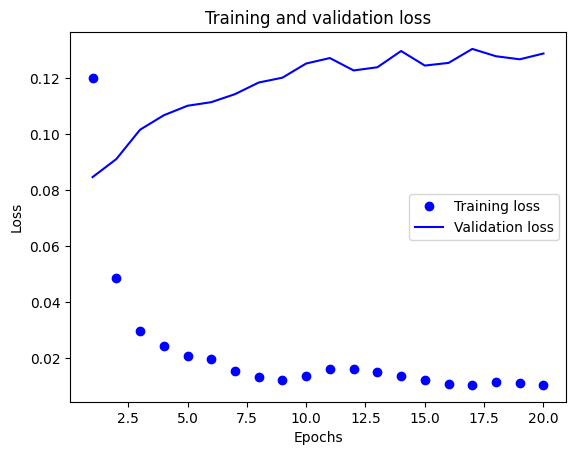

In [13]:
import matplotlib.pyplot as plt
k_history_dict = history.history
loss_values = k_history_dict["loss"]
val_loss_values = k_history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

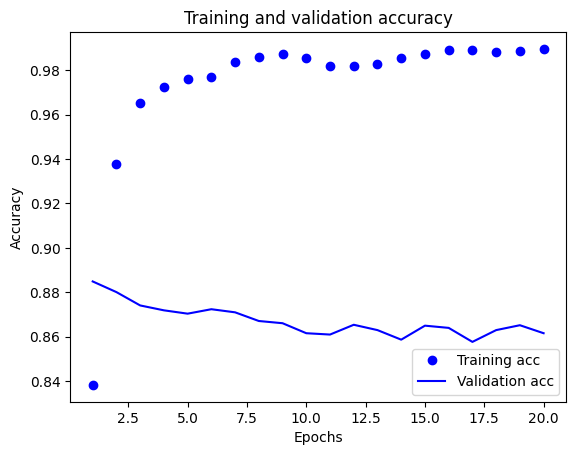

In [14]:
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
results = model.evaluate(k_x_test, k_y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8465 - loss: 0.1434


In [16]:
results

[0.14186759293079376, 0.8478400111198425]

#### Combining all code together along with dropout layer

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5191 - loss: 4.1404 - val_accuracy: 0.5534 - val_loss: 1.7921
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5438 - loss: 1.9001 - val_accuracy: 0.6115 - val_loss: 1.2262
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6022 - loss: 1.2143 - val_accuracy: 0.7139 - val_loss: 0.9070
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6962 - loss: 0.8685 - val_accuracy: 0.8228 - val_loss: 0.6761
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8227 - loss: 0.6314 - val_accuracy: 0.8673 - val_loss: 0.4711
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8930 - loss: 0.4303 - val_accuracy: 0.8805 - val_loss: 0.3162
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9243 - loss: 0.2794 - val_accuracy: 0.8793 - val_loss: 0.2176
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9468 - loss: 0.1831 - val_accuracy: 0.8830 - v

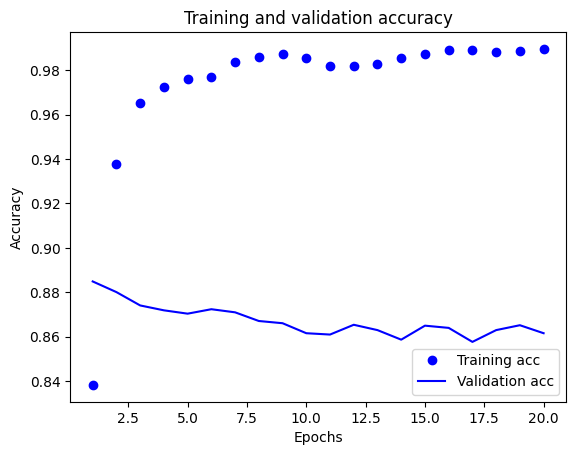

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8498 - loss: 0.1242


[0.1222953200340271, 0.8532000184059143]

In [17]:
## Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 3 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(k_x_test, k_y_test)
results


#### Summary about the three-layered neural network for IMDB data:
•	First we collected necessary additional libraries for our corresponding neural network to be in right process. From my understanding and insignificant research I have come to the conclusion that TensorFlow enjoys good support and implementations just like other dependencies such pytroch.

List of Imports are:

from tensorflow import keras  
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout

•	to that end, we import keras, keras.layers, Dense layer and Dropouts. On its own, each of them is really considerable in the aspect of the implementation process. Keras is the high-level API of TensorFlow 2: an easy to use yet highly effective application for solving all sorts of machine learning issues, with the emphasis on current deep learning. Keras’ principal component data structures are layers and models. There is a simple kind of model called Sequential which is a linear vertical stack of more complex sub-models. Dense stands for the count of the hidden layer nodes in the neural structure. Dropout: The meaning of dropout is to disconnect the input in bunch or hidden layer input. We are going to design the neural network layers now. model = keras.Sequential() #The most basic mode in keras is called serial model, and the layers are stacked sequentially. model.add(Dense(32,activation=’tanh’)) Stacking layers is very easy by the way of.add Additionally, the increases in number of hidden units equals to 32 and the activation function used is tanh. That being the case, I will proceed to the next topic of what is in a neural network.

1.	Input layer -- where we provide our input to it. – here we provide vector representation of IMDB data
2.	Hidden layers – it contains the number of dense units, and we can stack up as many layers as we want depending on the requirement.
3.	Output layer – output layer, Preferably the output layer has 1 dense unit.
Here in this task I tried to implement three layered approach as per the requirement given in the assignment.
   model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

The above code model was initiated as serial. We stack three layers, each of 32 dense units and the activation function we use is tanh. In the task, I so as keep it simple, I replaced relu with tanh as recommended by the assignment.

model.compile(optimizer="adagrad", loss="mean_squared_error", metrics=["accuracy"])

In the above piece of code we have used an optimizer as adagrad with mse loss. I have one concern here initially IMBD data uses a loss of binary_crossentrophy which is a probabilistic loss but what if we changed the regression loss. Further details are provided in the second source link.

In the above piece of code we have used an optimizer as adagrad with mse loss. I have one concern here initially IMBD data uses a loss of binary_crossentrophy which is a probabilistic loss but what if we changed the regression loss. Further details are provided in the second source link.

We split the data into training and validation part and the code below shows the split:

x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
Training the data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
                    
The above line of code represent it will train the neural network with 20 epoch and batch size of 256 and parallely it compare with validation data.
I used L1 and L2 regularizers but it does not gives much impact on the total validation accuracy.


   

        
Reference:
1.	https://keras.io/about
2.	https://keras.io/api/losses/
3.	https://keras.io/api/optimizers/


## Conclusions

##### 1. neural network designed with  3 layers
##### 2. Activation functions tanh is used instead of relu
##### 3. Optimizer adam is used instead of rmsprop
##### 4. L1 & L2 regularizers are used
##### 4. Dropout layer with 0.5 is used. That means we are dropping 50 percent of inputs during the training.

### Final accuracy of 99.19 and validation accuracy of 86.9 is achieved using the above changes..

